In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt

import datasets
import pandas as pd
import csv
import torch

In [16]:
def get_id_label_map(meta_file):
    N_IDENTITY = 9131  # total number of identities in VGG Face2
    N_IDENTITY_PRETRAIN = 8631  # the number of identities used in training by Caffe
    identity_list = meta_file
    df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")
    df["class"] = -1
    df.loc[df["Flag"] == 1, "class"] = range(N_IDENTITY_PRETRAIN)
    df.loc[df["Flag"] == 0, "class"] = range(N_IDENTITY_PRETRAIN, N_IDENTITY)
    # print(df)
    key = df["Class_ID"].values
    val = df["class"].values
    id_label_dict = dict(zip(key, val))
    return id_label_dict

In [8]:
# 0. id label map
meta_file = '/engram/nklab/VGGFace2/VGG-Face2/meta/identity_meta.csv' 
#'/scratch/nklab/projects/face_proj/datasets/VGGFace2/meta/identity_meta_cleaned.csv'
id_label_dict = get_id_label_map(meta_file)



/tmp/ipykernel_107505/3903684437.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")


In [11]:
id_label_dict

{'n000001': 8631,
 'n000002': 0,
 'n000003': 1,
 'n000004': 2,
 'n000005': 3,
 'n000006': 4,
 'n000007': 5,
 'n000008': 6,
 'n000009': 8632,
 'n000010': 7,
 'n000011': 8,
 'n000012': 9,
 'n000013': 10,
 'n000014': 11,
 'n000015': 12,
 'n000016': 13,
 'n000017': 14,
 'n000018': 15,
 'n000019': 16,
 'n000020': 17,
 'n000021': 18,
 'n000022': 19,
 'n000023': 20,
 'n000024': 21,
 'n000025': 22,
 'n000026': 23,
 'n000027': 24,
 'n000028': 25,
 'n000029': 8633,
 'n000030': 26,
 'n000031': 27,
 'n000032': 28,
 'n000033': 29,
 'n000034': 30,
 'n000035': 31,
 'n000036': 32,
 'n000037': 33,
 'n000038': 34,
 'n000039': 35,
 'n000040': 8634,
 'n000041': 36,
 'n000042': 37,
 'n000043': 38,
 'n000044': 39,
 'n000045': 40,
 'n000046': 41,
 'n000047': 42,
 'n000048': 43,
 'n000049': 44,
 'n000050': 45,
 'n000051': 46,
 'n000052': 47,
 'n000053': 48,
 'n000054': 49,
 'n000055': 50,
 'n000056': 51,
 'n000057': 52,
 'n000058': 53,
 'n000059': 54,
 'n000060': 55,
 'n000061': 56,
 'n000062': 57,
 'n000063'

In [13]:
# 1. data loader
root = '/scratch/nklab/projects/face_proj/datasets/VGGFace2/'
# '/scratch/nklab/projects/face_proj/models/vgg16_bn/VGGFace2/'
train_img_list_file = root+ 'meta/train_list.txt' # args.train_img_list_file
test_img_list_file = root  + 'meta/test_list.txt' # args.test_img_list_file

kwargs = {} # {'num_workers': args.workers, 'pin_memory': True} if cuda else {}

In [14]:
dt = datasets.VGG_Faces2(root, train_img_list_file, id_label_dict, split='train')
train_loader = torch.utils.data.DataLoader(dt, batch_size=128, shuffle=True, **kwargs)


train/n000002/0001_01.jpg
processing: 0 images for train
train/n000002/0002_01.jpg
train/n000002/0003_01.jpg
train/n000002/0004_01.jpg
train/n000002/0005_01.jpg
train/n000002/0006_01.jpg
train/n000002/0007_01.jpg
train/n000002/0008_01.jpg
train/n000002/0009_01.jpg
train/n000002/0010_01.jpg
train/n000002/0011_01.jpg
train/n000002/0012_01.jpg
train/n000002/0013_01.jpg
train/n000002/0014_01.jpg
train/n000002/0015_01.jpg
train/n000002/0016_01.jpg
train/n000002/0017_01.jpg
train/n000002/0018_01.jpg
train/n000002/0018_02.jpg
train/n000002/0018_03.jpg
train/n000002/0018_04.jpg
train/n000002/0019_01.jpg
train/n000002/0020_01.jpg
train/n000002/0021_01.jpg
train/n000002/0022_01.jpg
train/n000002/0023_01.jpg
train/n000002/0024_01.jpg
train/n000002/0025_01.jpg
train/n000002/0026_01.jpg
train/n000002/0027_01.jpg
train/n000002/0028_01.jpg
train/n000002/0029_01.jpg
train/n000002/0030_01.jpg
train/n000002/0031_01.jpg
train/n000002/0031_02.jpg
train/n000002/0031_03.jpg
train/n000002/0031_04.jpg
train/n

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
img, label, img_file, class_id = next(iter(train_loader))

In [23]:
dt = datasets.VGG_Faces2(root, test_img_list_file, id_label_dict, split='test')
test_loader = torch.utils.data.DataLoader(dt, batch_size=128, shuffle=True, **kwargs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



test/n008890/0200_01.jpg
test/n008890/0201_01.jpg
test/n008890/0202_01.jpg
test/n008890/0203_01.jpg
test/n008890/0204_01.jpg
test/n008890/0205_01.jpg
test/n008890/0206_02.jpg
test/n008890/0207_01.jpg
test/n008890/0208_02.jpg
test/n008890/0209_01.jpg
test/n008890/0210_01.jpg
test/n008890/0211_01.jpg
test/n008890/0212_01.jpg
test/n008890/0213_01.jpg
test/n008890/0214_01.jpg
test/n008890/0215_01.jpg
test/n008890/0216_01.jpg
test/n008890/0217_02.jpg
test/n008890/0218_01.jpg
test/n008890/0219_01.jpg
test/n008890/0220_01.jpg
test/n008890/0221_01.jpg
test/n008890/0222_01.jpg
test/n008890/0223_01.jpg
test/n008890/0224_02.jpg
test/n008890/0225_01.jpg
test/n008890/0226_01.jpg
test/n008890/0227_01.jpg
test/n008890/0228_01.jpg
test/n008890/0229_01.jpg
test/n008890/0230_01.jpg
test/n008890/0231_01.jpg
test/n008890/0232_01.jpg
test/n008890/0233_01.jpg
test/n008890/0234_01.jpg
test/n008890/0235_01.jpg
test/n008890/0236_01.jpg
test/n008890/0237_02.jpg
test/n008890/0238_01.jpg
test/n008890/0239_01.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


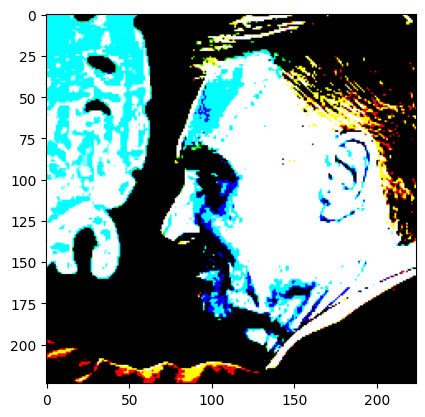

In [25]:
img, label, img_file, class_id = next(iter(test_loader))
plt.imshow(img.movedim(1,-1)[1])